<a href="https://colab.research.google.com/github/prietykumari22/datadets/blob/main/summer_olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("summer.csv")

In [ ]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


Q1.In how many citiessummer olympics is held so far

In [ ]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [ ]:
len(df['City'].unique())

22

to count cites summer olympics has held

In [ ]:
df['City'].unique().shape

(22,)

In [ ]:
df[df['City'] =='summer olympics']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


In [ ]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [ ]:
df['Medal'].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [ ]:
df[df['Medal'] == 'Gold']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


Q2.Which sport is having most number of gold medal so far


In [ ]:
df['Medal'].value_counts()

Gold      10486
Bronze    10369
Silver    10310
Name: Medal, dtype: int64

In [ ]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [ ]:

df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0,1,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,0,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,1,0,0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,0,1,0
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,1,0,0
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,0,1,0
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,0,0,1
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,1,0,0


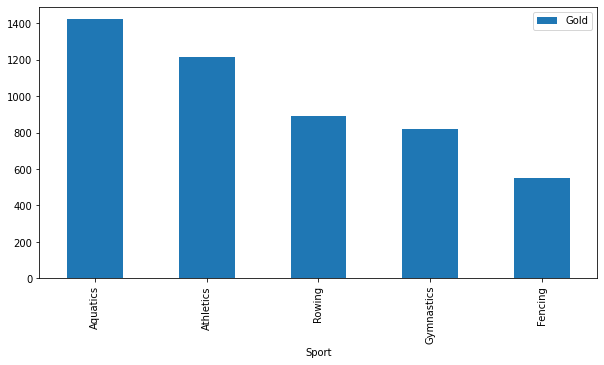

In [ ]:
data=df.groupby('Sport').sum()[['Gold']].sort_values('Gold',ascending=False).reset_index().head()
data.plot(x='Sport', y='Gold',kind='bar',figsize=(10,5))

In [ ]:
data=df.groupby('Athlete').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head()
data

,Athlete,Gold,Silver,Bronze
0,"PHELPS, Michael",18,2,2
1,"NURMI, Paavo",9,3,0
2,"LATYNINA, Larisa",9,5,4
3,"SPITZ, Mark",9,1,1
4,"LEWIS, Carl",9,1,0


In [ ]:
data=[]
for Medal in df['Athlete'].unique():
  data.append([Medal,len(df[df['Athlete'] == Medal])])
  data=pd.DataFrame(data ,columns=['Athlete','freq'])
  data=data.sort_values(by='Athlete',ascending=True).head(5)
  data.plot(x='Athlete', y='freq',kind='bar',figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Q3.Which sport is having most no of medal so far 

In [ ]:
data=[]
for Medal in df['Sport'].unique():
  data.append([Medal,len(df[df['Sport'] == Medal])])

In [ ]:
data

[['Aquatics', 4170],
 ['Athletics', 3638],
 ['Cycling', 1105],
 ['Fencing', 1613],
 ['Gymnastics', 2307],
 ['Shooting', 1150],
 ['Tennis', 296],
 ['Weightlifting', 593],
 ['Wrestling', 1212],
 ['Archery', 329],
 ['Basque Pelota', 4],
 ['Cricket', 24],
 ['Croquet', 8],
 ['Equestrian', 939],
 ['Football', 1497],
 ['Golf', 30],
 ['Polo', 66],
 ['Rowing', 2667],
 ['Rugby', 192],
 ['Sailing', 1109],
 ['Tug of War', 94],
 ['Boxing', 894],
 ['Lacrosse', 59],
 ['Roque', 3],
 ['Hockey', 1422],
 ['Jeu de paume', 3],
 ['Rackets', 10],
 ['Skating', 27],
 ['Water Motorsports', 5],
 ['Modern Pentathlon', 180],
 ['Ice Hockey', 27],
 ['Basketball', 1012],
 ['Canoe / Kayak', 1002],
 ['Handball', 973],
 ['Judo', 491],
 ['Volleyball', 994],
 ['Table Tennis', 144],
 ['Badminton', 144],
 ['Baseball', 335],
 ['Softball', 180],
 ['Taekwondo', 112],
 ['Triathlon', 24],
 ['Canoe', 81]]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


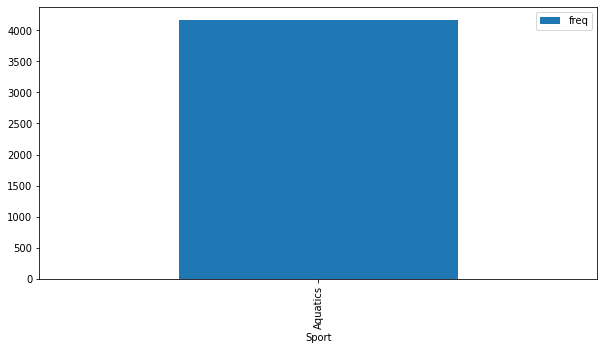

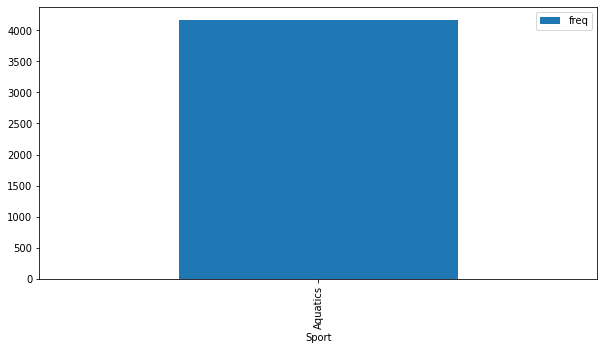

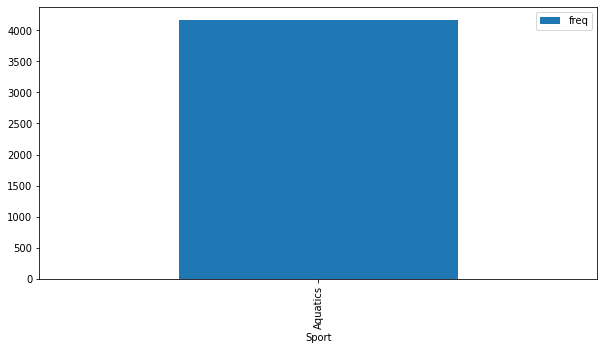

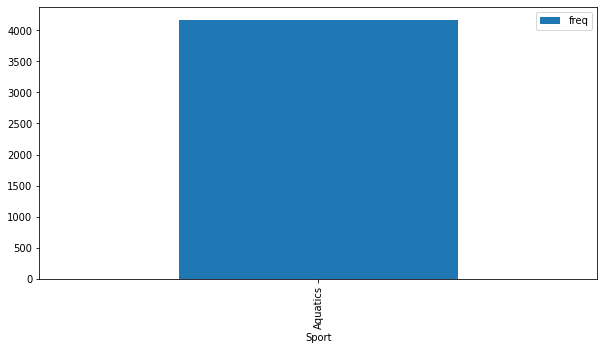

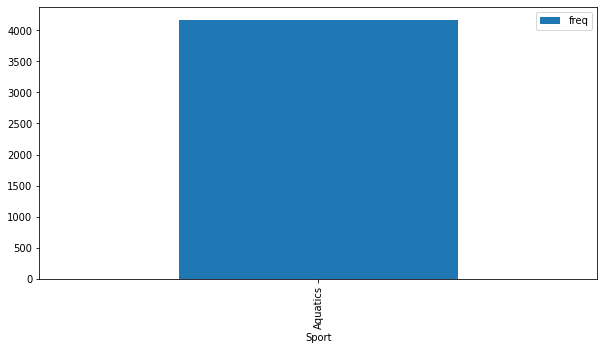

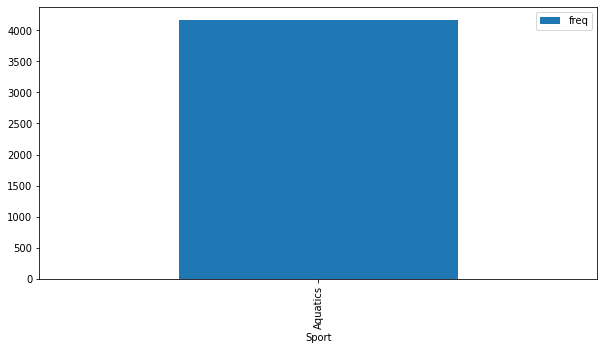

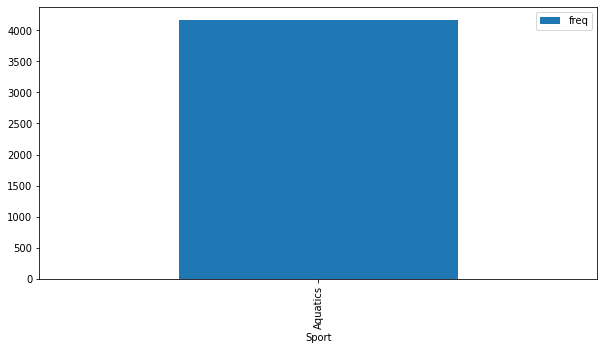

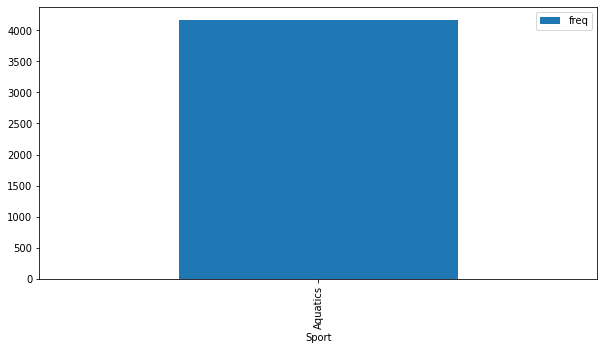

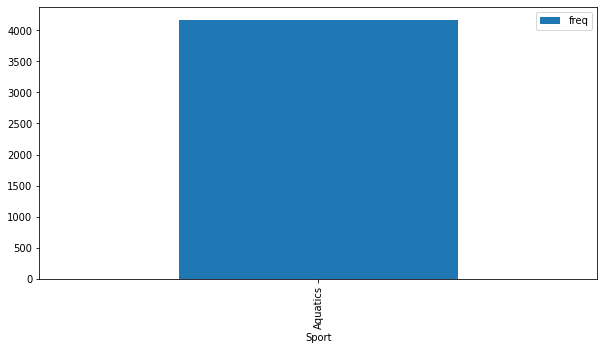

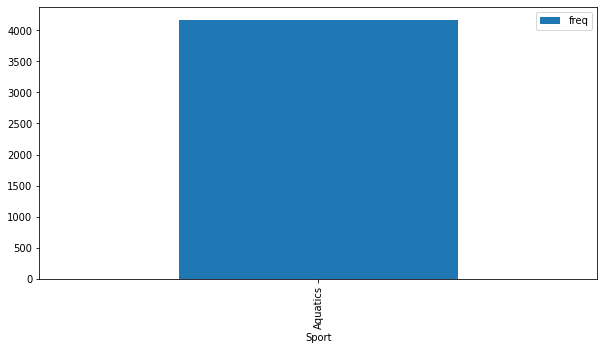

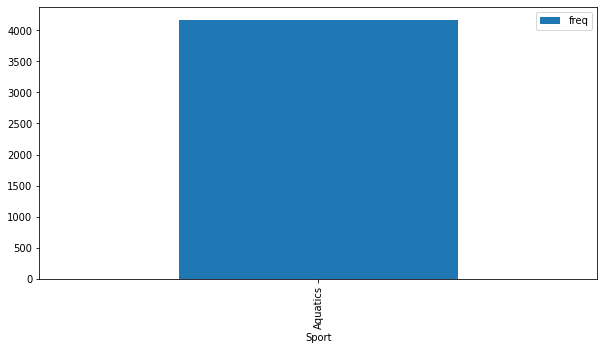

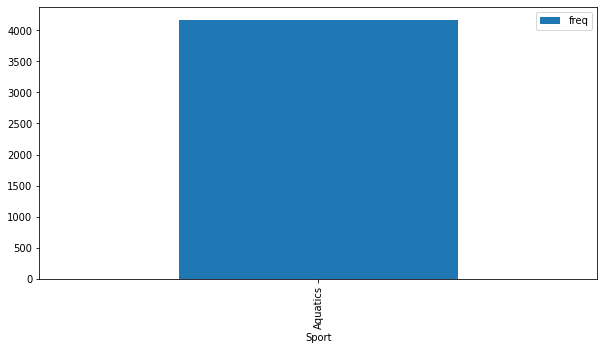

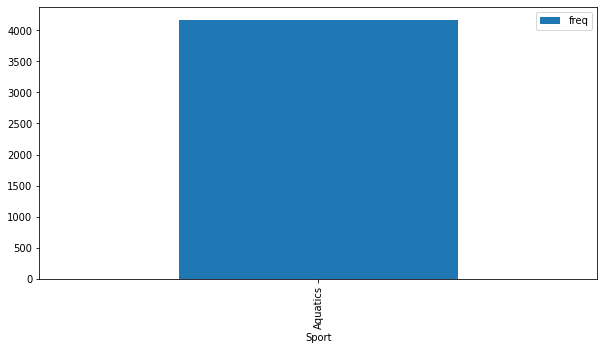

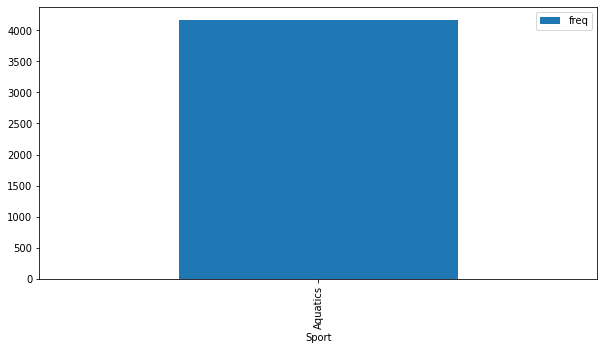

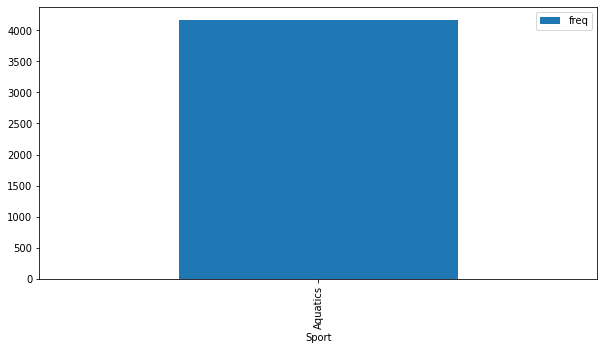

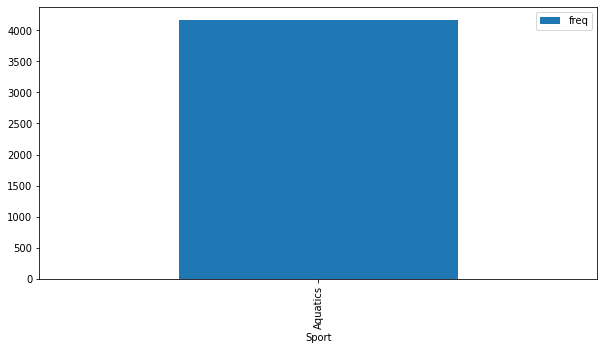

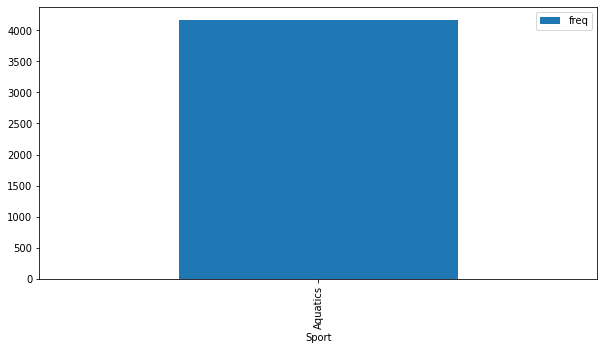

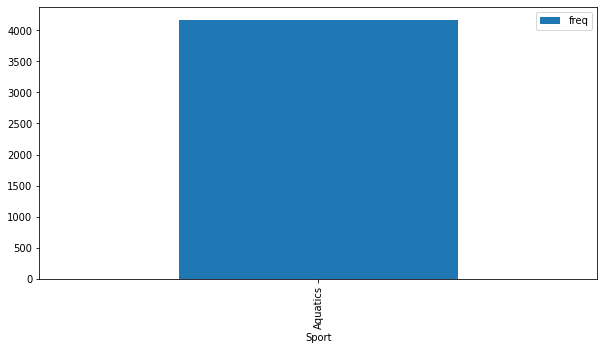

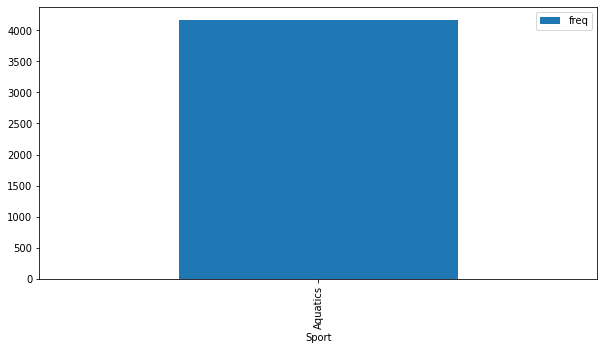

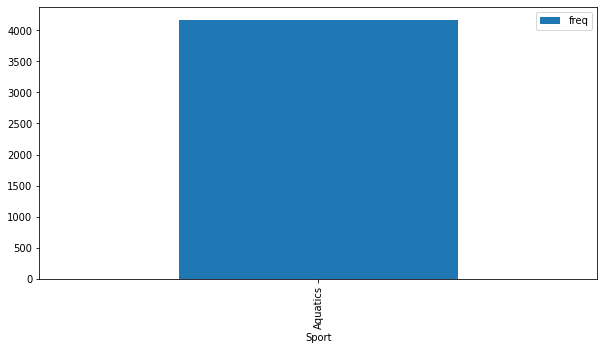

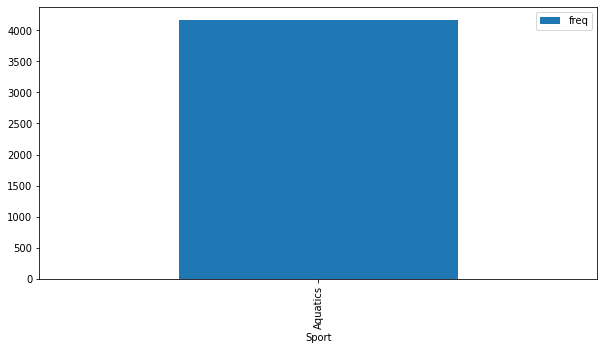

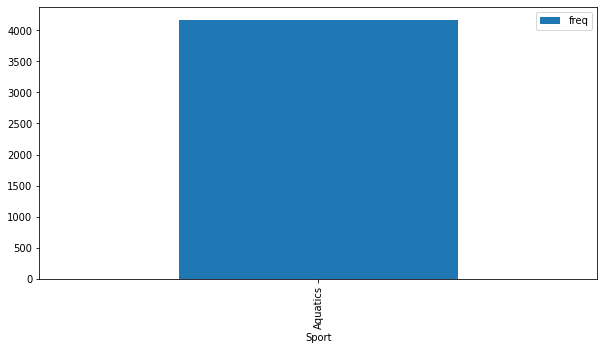

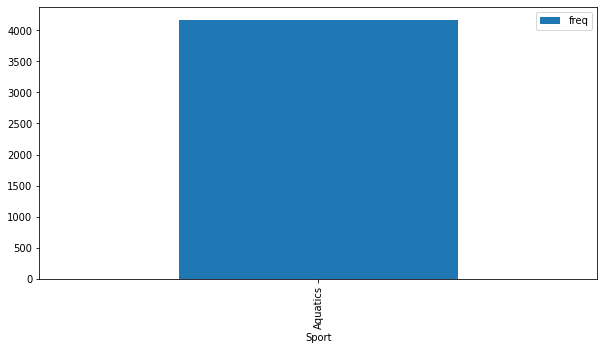

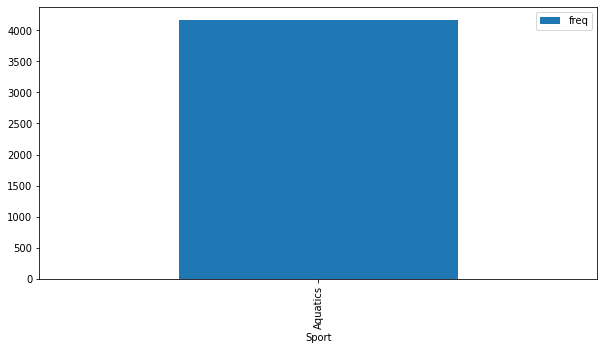

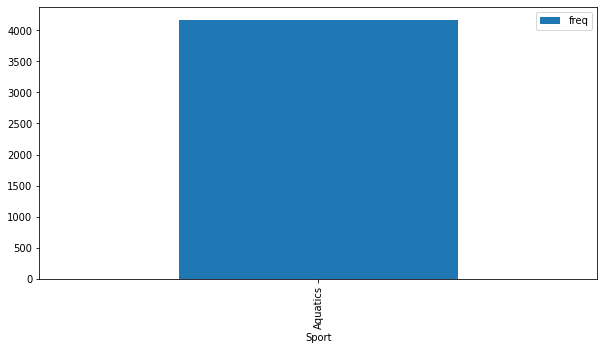

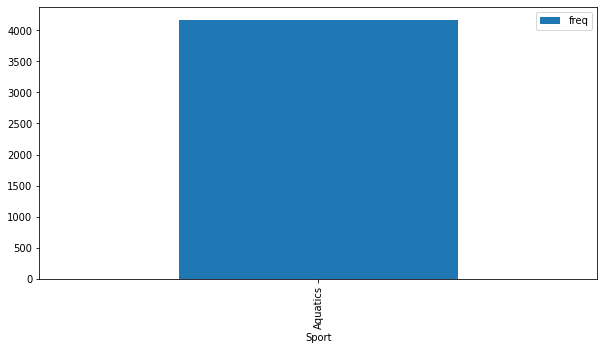

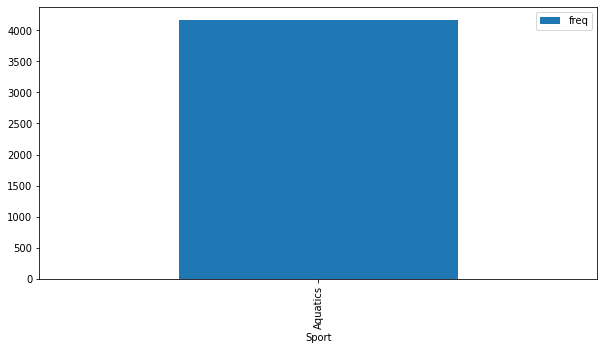

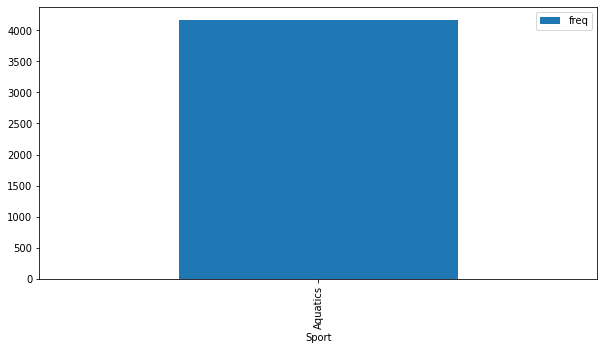

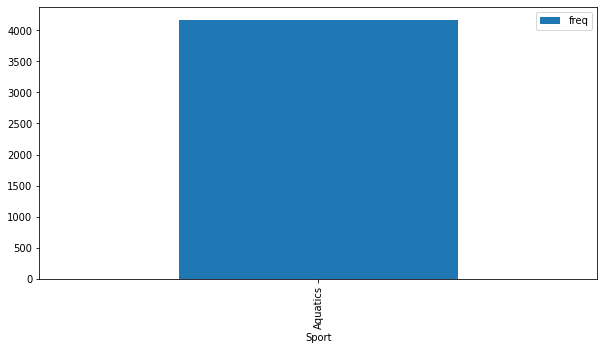

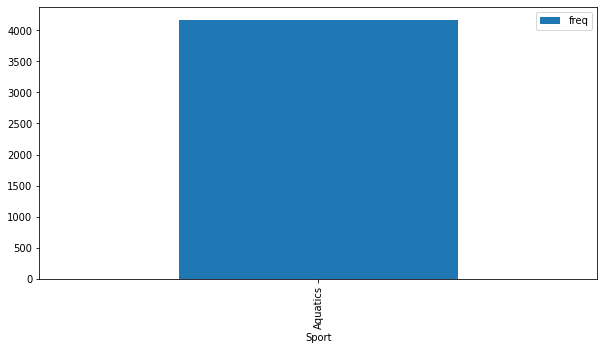

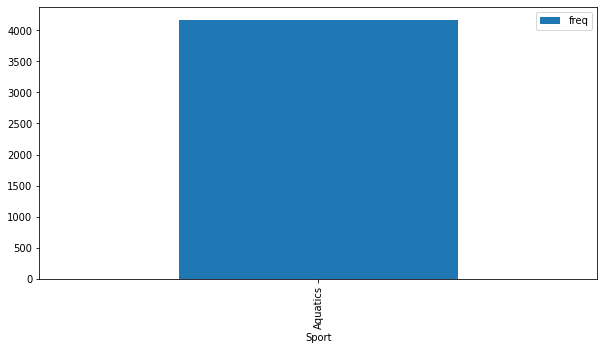

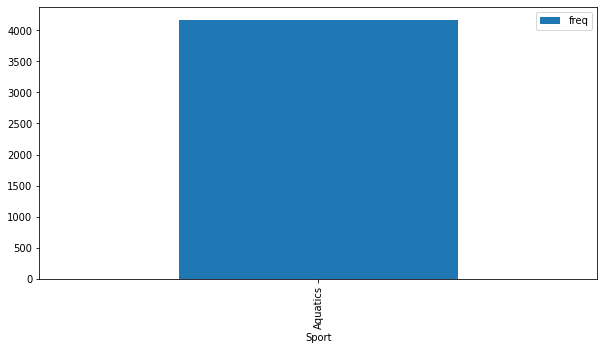

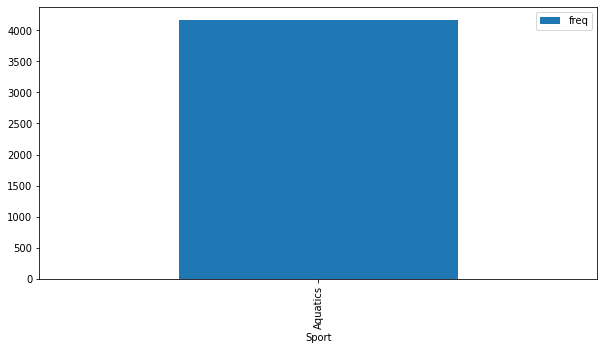

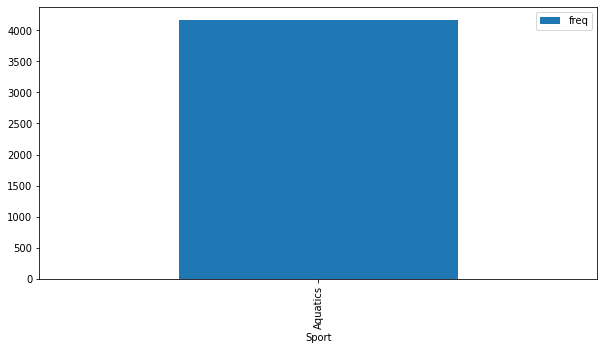

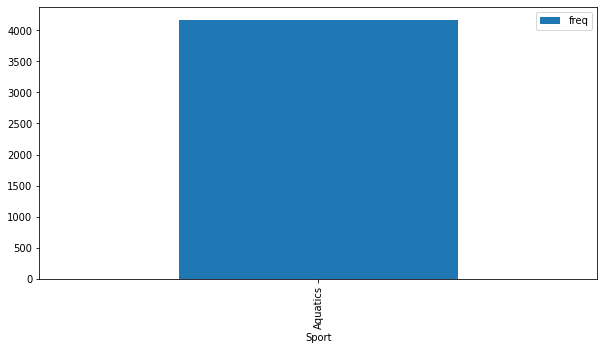

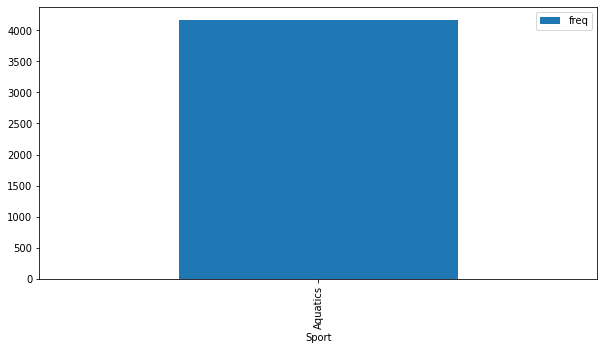

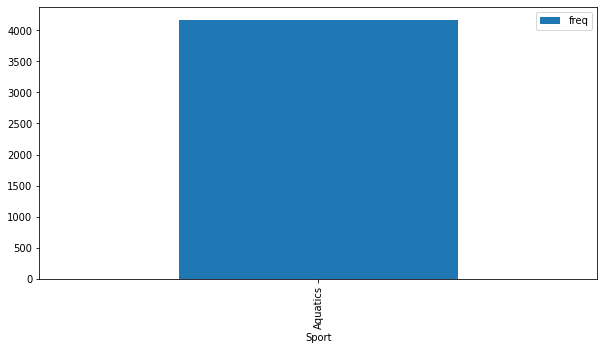

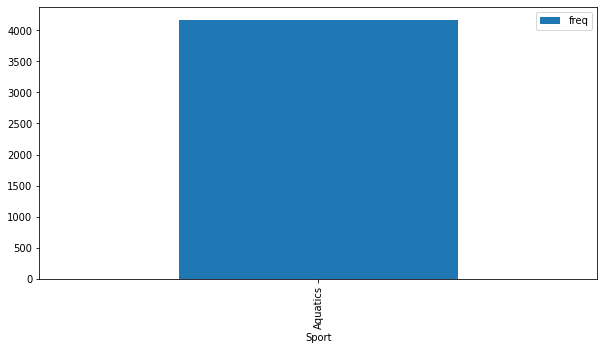

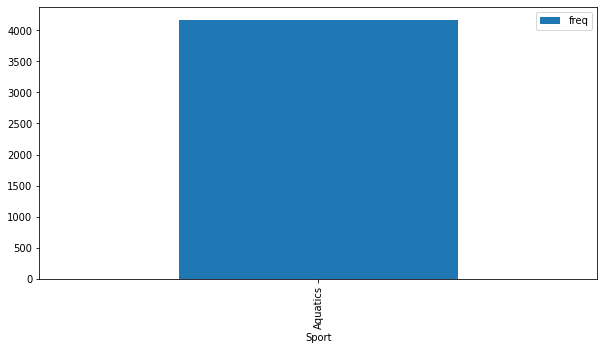

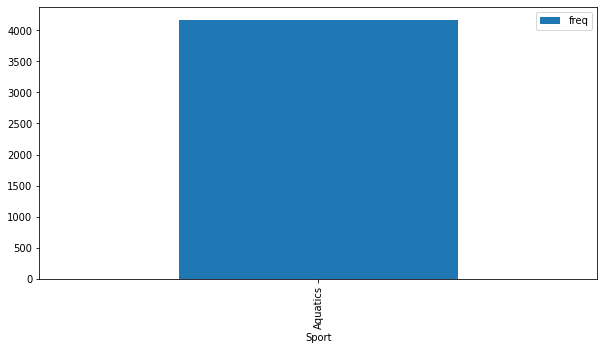

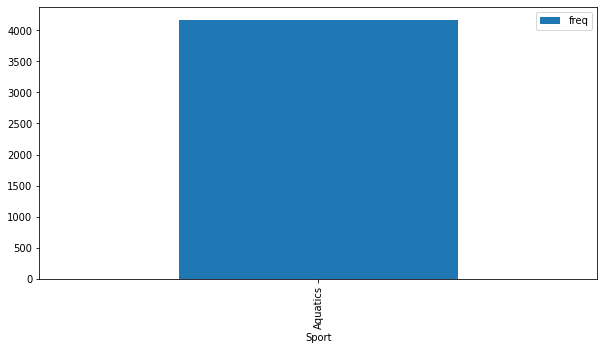

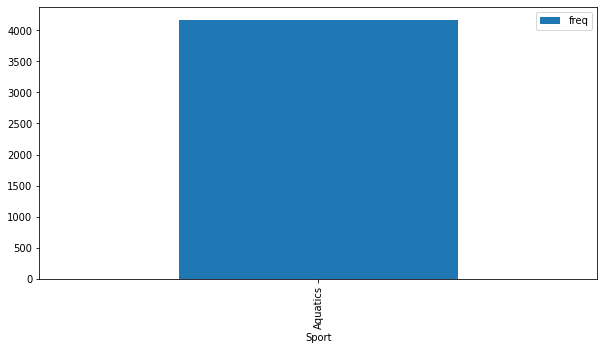

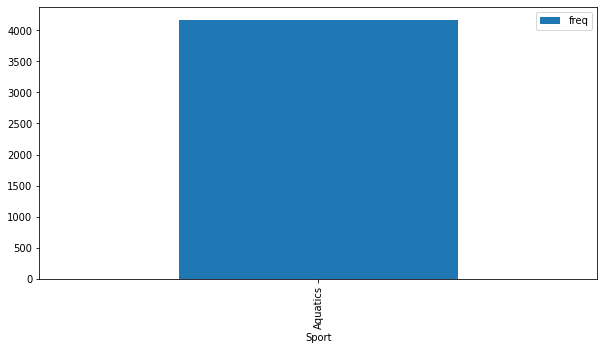

In [ ]:
data=[]
for Medal in df['Sport'].unique():
  data.append([Medal,len(df[df['Sport'] == Medal])])
  data=pd.DataFrame(data ,columns=['Sport','freq'])
  data=data.sort_values(by='Sport',ascending=True).head(5)
  data.plot(x='Sport', y='freq',kind='bar',figsize=(10,5))

# Q3 **COINTINUED** 

In [ ]:
df.groupby('Sport').sum()['Medal'].sort_values(ascending=False).plot.bar(figsize=(10,5))

KeyError: ignored

## Q4 which playesr has won the most gold

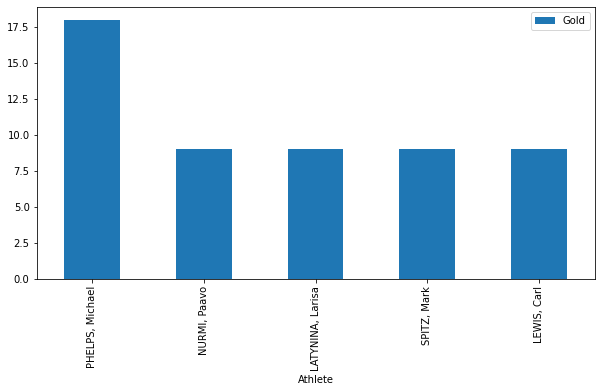

In [24]:
data=df.groupby('Athlete').sum()[['Gold']].sort_values('Gold',ascending=False).reset_index().head()
data.plot(x='Athlete', y='Gold',kind='bar',figsize=(10,5))

## Q5  which player has won the most medal

In [ ]:
data=df.groupby('Athlete').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head()
data